In [3]:
import pandas as pd
notas = pd.read_csv("ratings.csv")

In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns= ['usuarioId', "filmeId","nota","momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

<AxesSubplot:ylabel='Frequency'>

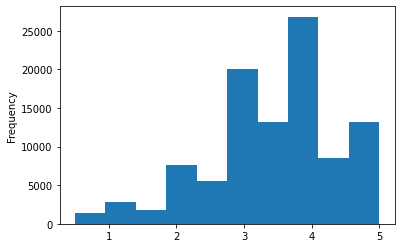

In [11]:
import matplotlib as mp
notas.nota.plot(kind='hist')

In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

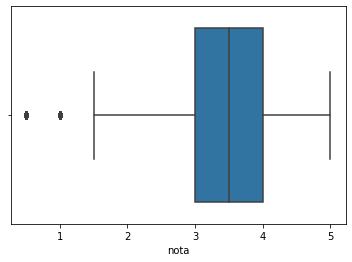

In [15]:
import seaborn as sns
sns.boxplot(notas.nota)

In [18]:
filmes= pd.read_csv("movies.csv")
filmes.columns=["FilmeId","titulo","generos"]
filmes.head()

,FilmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
notas.query("filmeId==1").nota.mean()


3.9209302325581397

In [36]:
medias_por_filme = notas.groupby("filmeId").mean() ["nota"]
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

<AxesSubplot:xlabel='nota'>

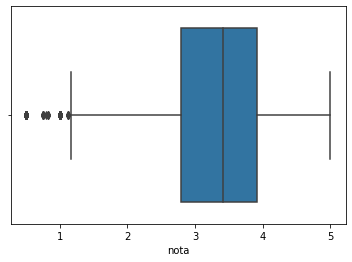

In [31]:
sns.boxplot(medias_por_filme)

<AxesSubplot:xlabel='nota', ylabel='Density'>

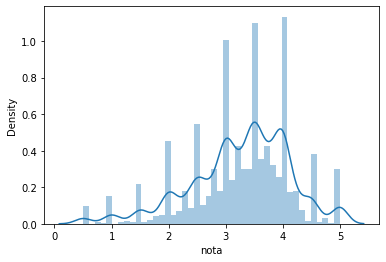

In [38]:
sns.distplot(medias_por_filme)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

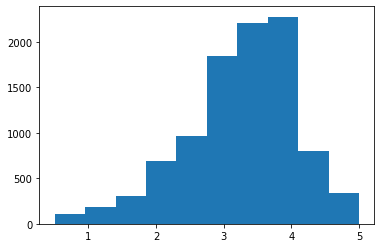

In [41]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)

In [50]:
tmdb=pd.read_csv("tmdb_5000_movies.csv")
tmdb.original_language.unique()


array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [57]:
contagem_de_lingua=tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns=["original_language","total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

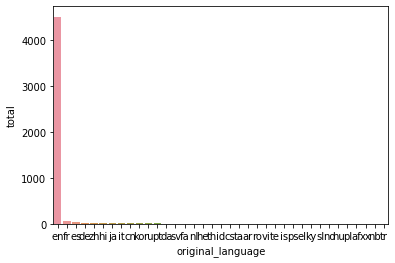

In [60]:
sns.barplot(x="original_language",y="total",data= contagem_de_lingua)

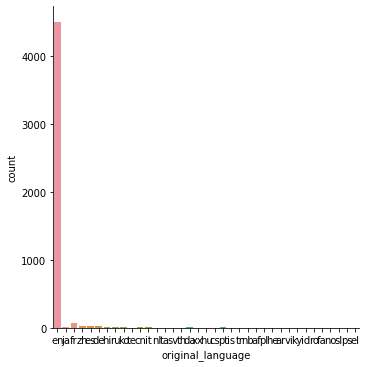

In [63]:
sns.catplot(x="original_language",kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x16ba91d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(1.0

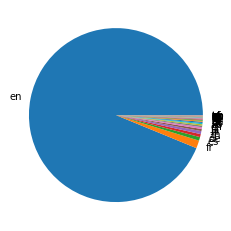

In [66]:
plt.pie(contagem_de_lingua["total"],labels=contagem_de_lingua["original_language"])

In [70]:
total_por_lingua= tmdb["original_language"].value_counts()
total_geral=total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc["en"]
total_do_resto= total_geral-total_de_ingles
print(total_de_ingles,total_do_resto)

4505 298


In [74]:
dados={
    'lingua':['ingles','outros'],
    'total':[total_de_ingles,total_do_resto]
}
dados= pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

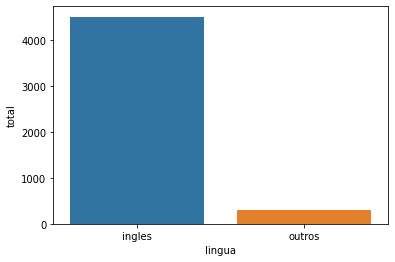

In [76]:
sns.barplot(x="lingua",y="total", data=dados)

([<matplotlib.patches.Wedge at 0x19208ab0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

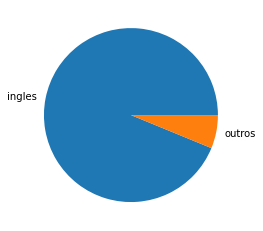

In [82]:
plt.pie(dados["total"],labels= dados["lingua"])

In [86]:
total_por_lingua_de_outros_filmes=tmdb.query("original_language!= 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes


fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
id     2
ar     2
cs     2
ta     2
ro     2
hu     1
af     1
is     1
el     1
ps     1
pl     1
sl     1
te     1
ky     1
tr     1
no     1
nb     1
xx     1
vi     1
Name: original_language, dtype: int64

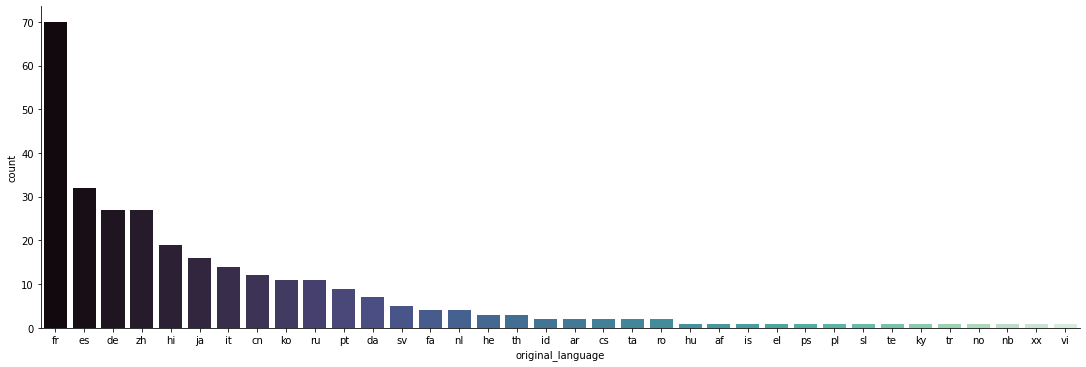

In [107]:
filmes_sem_lingua_original_em_ingles=tmdb.query("original_language!= 'en'")

sns.catplot(x="original_language",kind="count",data=filmes_sem_lingua_original_em_ingles,
aspect=3,
palette="mako",
order=total_por_lingua_de_outros_filmes.index)

In [109]:
notas_do_toy_story= notas.query("filmeId==1")
notas_do_jumanji= notas.query("filmeId==2")
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


In [121]:
print("Nota média do Toy Story %.2f "%notas_do_toy_story.nota.median() )
print("Nota média do Jumanji %.2f "%notas_do_jumanji.nota.median() )


Nota média do Toy Story 4.00 
Nota média do Jumanji 3.50 


In [132]:
import numpy as np

filme1= np.append(np.array([2.5]*10),np.array([3.5]*10))
filme2= np.append(np.array([5]*10),np.array([1]*10))
print=((filme1).mean(),(filme2).mean())
print=(np.median(filme1),np.median(filme2))
print=(np.std(filme1),np.std(filme2))


<AxesSubplot:xlabel='filmeId', ylabel='nota'>

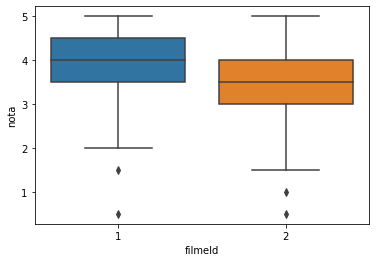

In [131]:
sns.boxplot(x="filmeId",y="nota",data=notas.query("filmeId in [1,2]"))

In [139]:
print(np.std(filme1), np.std(filme2))

TypeError: 'tuple' object is not callable